Linear Regresi dengan basis

In [22]:
# Impor library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score # Import necessary functions
import numpy as np # Import numpy for sqrt function
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.linear_model import LinearRegression # Import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [24]:
# Memuat dataset dari file CSV
data = pd.read_csv('/content/FinancialMarket.csv')

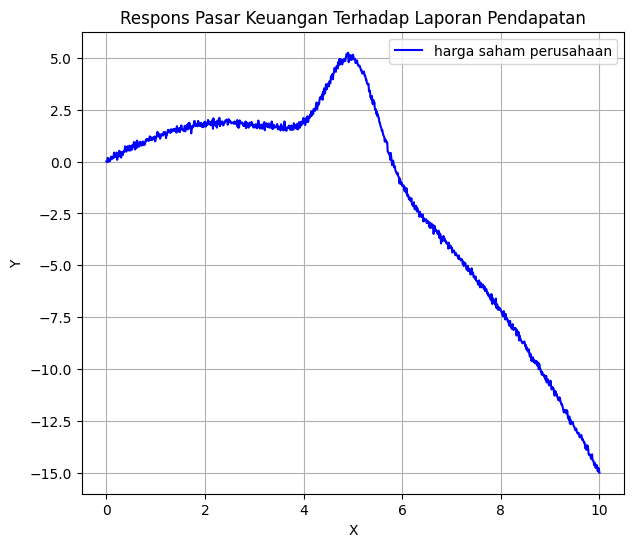

In [28]:
# Ekstrak kolom x dan combined_data
x = data['x'].values
combined_data = data['combined_data'].values

# Langkah 3: Visualisasikan dataset
plt.figure(figsize=(7, 6))

# Plot data yang digabungkan
plt.plot(x, combined_data, label="harga saham perusahaan", color='blue')

# Tambahkan label dan judul
plt.title('Respons Pasar Keuangan Terhadap Laporan Pendapatan')
plt.xlabel('X')  # Ganti dengan label yang lebih sesuai berdasarkan data Anda
plt.ylabel('Y')  # Ganti dengan label yang lebih sesuai berdasarkan data Anda
plt.grid(True)

# Tambahkan legenda
plt.legend()

# Tampilkan grafik
plt.show()

In [29]:
# Reshape x to a 2D array for sklearn
X = x.reshape(-1, 1)
y = combined_data  # Assuming 'combined_data' is your target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split data, adjust test_size and random_state as needed

# Create and fit the vanilla Linear Regression model
model_vanilla = LinearRegression() # Create a LinearRegression model
model_vanilla.fit(X_train, y_train) # Fit the model to the training data

# Make predictions on the training set using the vanilla model
y_pred_vanilla = model_vanilla.predict(X_train)

# Vanilla Regression Metrics
mse_vanilla = mean_squared_error(y_train, y_pred_vanilla)
rmse_vanilla = np.sqrt(mse_vanilla)
r2_vanilla = r2_score(y_train, y_pred_vanilla)

print("Vanilla Regression:")
print(f"MSE: {mse_vanilla}")
print(f"RMSE: {rmse_vanilla}")
print(f"R^2: {r2_vanilla}")

Vanilla Regression:
MSE: 10.011343376462008
RMSE: 3.1640706971339956
R^2: 0.6485956299013602


In [30]:
# Create polynomial features (for basis function regression)
poly = PolynomialFeatures(degree=2)  # Adjust the degree as needed
X_train_poly = poly.fit_transform(X_train)

# Create and fit the basis function regression model
model_basis = LinearRegression()
model_basis.fit(X_train_poly, y_train)

# Make predictions on the training set using the basis function model
y_pred_basis = model_basis.predict(X_train_poly)

# Basis Function Regression Metrics
mse_basis = mean_squared_error(y_train, y_pred_basis)
rmse_basis = np.sqrt(mse_basis)
r2_basis = r2_score(y_train, y_pred_basis)

print("\nBasis Function Regression Model:")
print(f"MSE: {mse_basis}")
print(f"RMSE: {rmse_basis}")
print(f"R^2: {r2_basis}")


Basis Function Regression Model:
MSE: 1.3850749144232828
RMSE: 1.1768920572521862
R^2: 0.9513830102974304


Linear Regresi biasa

In [31]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [33]:
# Load dataset dari CSV
data = pd.read_csv('/content/FinancialMarket.csv')

In [36]:
# Asumsikan file CSV memiliki dua kolom 'x' dan 'combined_data' (Ganti dengan nama kolom sebenarnya jika berbeda)
X = data[['x']]  # Pastikan X adalah array 2D
y = data['combined_data']  # y adalah target, dan nama kolom di CSV adalah 'combined_data'

# Bagi dataset menjadi training dan testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# 1. Regresi Linear Biasa
# Buat model regresi linear biasa
linear_reg = LinearRegression()

# Latih model regresi linear pada data training
linear_reg.fit(X_train, y_train)

# Prediksi data untuk training dan testing set menggunakan model linear
y_pred_linear_train = linear_reg.predict(X_train)
y_pred_linear_test = linear_reg.predict(X_test)

In [38]:
# 2. Regresi Linear dengan Basis Fungsi (Basis Function Regression)
# Buat fitur polinomial untuk basis fungsi
poly = PolynomialFeatures(degree=4)  # Menggunakan derajat 4 untuk polinomial

# Transformasikan X_train dan X_test menjadi bentuk polinomial
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Buat model regresi linear untuk basis fungsi
basis_function_reg = LinearRegression()

# Latih model regresi linear pada data training yang sudah diubah menjadi basis fungsi
basis_function_reg.fit(X_train_poly, y_train)

# Prediksi data untuk training dan testing set menggunakan model basis fungsi
y_pred_basis_train = basis_function_reg.predict(X_train_poly)
y_pred_basis_test = basis_function_reg.predict(X_test_poly)

In [40]:
# 3. Evaluasi Model - Menghitung MSE, RMSE, dan R-squared

# Fungsi untuk mencetak evaluasi
def evaluate_model(y_true_train, y_pred_train, y_true_test, y_pred_test, model_name):
    # Mean Squared Error (MSE)
    mse_train = mean_squared_error(y_true_train, y_pred_train)
    mse_test = mean_squared_error(y_true_test, y_pred_test)

    # Root Mean Squared Error (RMSE)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    # R-squared
    r2_train = r2_score(y_true_train, y_pred_train)
    r2_test = r2_score(y_true_test, y_pred_test)

    # Cetak hasil evaluasi
    print(f"{model_name} - Evaluasi Model:")
    print(f"Train MSE: {mse_train:.4f}, Test MSE: {mse_test:.4f}")
    print(f"Train RMSE: {rmse_train:.4f}, Test RMSE: {rmse_test:.4f}")
    print(f"Train R^2: {r2_train:.4f}, Test R^2: {r2_test:.4f}")
    print("")
    # Evaluasi Regresi Linear Biasa
evaluate_model(y_train, y_pred_linear_train, y_test, y_pred_linear_test, "Regresi Linear Biasa")

# Evaluasi Regresi Linear dengan Basis Fungsi
evaluate_model(y_train, y_pred_basis_train, y_test, y_pred_basis_test, "Regresi Linear Basis Fungsi")

Regresi Linear Biasa - Evaluasi Model:
Train MSE: 10.0113, Test MSE: 9.4014
Train RMSE: 3.1641, Test RMSE: 3.0662
Train R^2: 0.6486, Test R^2: 0.6782

Regresi Linear Basis Fungsi - Evaluasi Model:
Train MSE: 0.9721, Test MSE: 0.9656
Train RMSE: 0.9859, Test RMSE: 0.9827
Train R^2: 0.9659, Test R^2: 0.9669



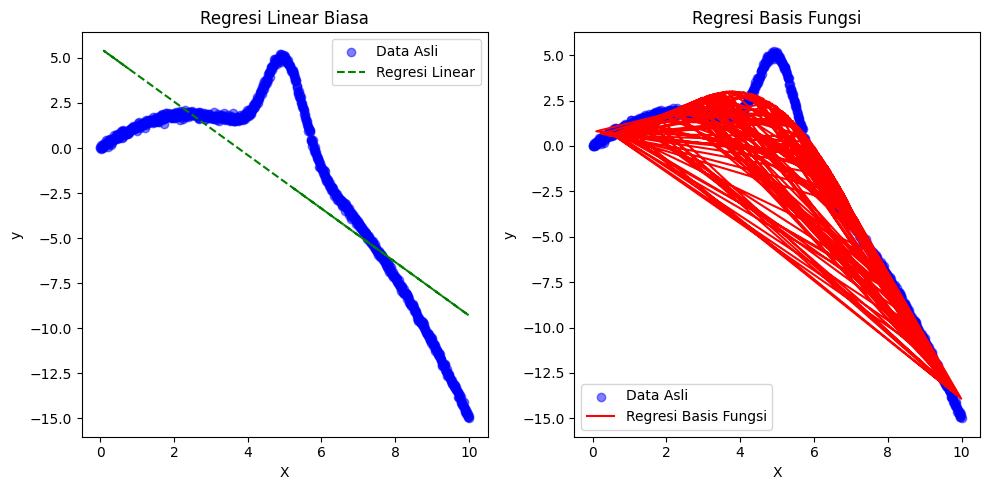

In [41]:
# 4. Plot Hasil Model

# Buat plot untuk Regresi Linear Biasa
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # Plot pertama untuk regresi linear biasa
plt.scatter(X, y, color='blue', label="Data Asli", alpha=0.5)
plt.plot(X_test, y_pred_linear_test, color='green', linestyle='--', label="Regresi Linear")
plt.title("Regresi Linear Biasa")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Buat plot untuk Regresi Linear dengan Basis Fungsi
plt.subplot(1, 2, 2)  # Plot kedua untuk regresi linear basis fungsi
plt.scatter(X, y, color='blue', label="Data Asli", alpha=0.5)
plt.plot(X_test, y_pred_basis_test, color='red', label="Regresi Basis Fungsi")
plt.title("Regresi Basis Fungsi")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Tampilkan plot
plt.tight_layout()
plt.show()

Hasil :

*   Regresi Linear Biasa: Cocok untuk data linear sederhana, namun mungkin kurang akurat jika data memiliki pola non-linear.

*   Regresi Basis Fungsi: Dengan basis fungsi polinomial, model ini dapat menangkap pola non-linear dalam data lebih baik.
